In [17]:
# Dependencies
import tweepy
import json
import pandas as pd
import csv
import matplotlib.pyplot as plt
import time
import numpy as np
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys 
consumer_key = "yUHOWwWG9Pj3C8f21tnm4rWOb"
consumer_secret = "JowHOFRinCn2DOOd7ZP8ToHkU83piXhZ0ZPUopHTW7grDS0XPI"
access_token = "975055841089867776-GRHdjTQ4NuqwZNfevh4L54bxNgiw1Hu"
access_token_secret = "nR7n7Qp5lduLHCH6rSF46gJi8YolN6pRLXnE63lghWc3T"



In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# # Get all tweets from home feed
# public_tweets = api.home_timeline()

# # Import CSV file into Data Frame
# popular_tweeters = pd.read_csv("PopularAccounts.csv", dtype=str)

# popular_tweeters.head()

In [3]:
# List of target users
target_users = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

In [4]:
# Variables for storing DataFrame information
source_account = []
text = []
date = []
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
tweets_ago = []

In [5]:
# Looping through all the users
for user in target_users:
    
    # Tweet count
    tweet_count = 0

    # Get the last 100 tweets
    for x in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all the tweets
        for tweet in public_tweets:
        
            # Incrementing tweet_count
            tweet_count += 1
    
            # Adding values to list
            source_account.append(user)
            text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweets_ago.append(tweet_count)
    
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
    
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)

In [6]:
# Creating dictionary for DataFrame
tweet_info = {
    "Source Account": source_account,
    "Tweet": text,
    "Date": date,
    "Compound Score": compound_list,
    "Positive Score": positive_list,
    "Neutral Score": neutral_list,
    "Negative Score": negative_list,
    "Tweets Ago": tweets_ago
}

tweets_df = pd.DataFrame(tweet_info, columns = ['Source Account', 'Tweet', 'Date', 'Compound Score', 'Positive Score',
                                               'Neutral Score', 'Negative Score', 'Tweets Ago'])
tweets_df.head()

,Source Account,Tweet,Date,Compound Score,Positive Score,Neutral Score,Negative Score,Tweets Ago
0,@BBCWorld,Easter: Irish pubs lift Good Friday alcohol ba...,Fri Mar 30 05:55:35 +0000 2018,-0.1779,0.215,0.519,0.267,1
1,@BBCWorld,RT @BBCNewsAsia: The former Korean Air executi...,Fri Mar 30 05:49:39 +0000 2018,-0.8625,0.000,0.676,0.324,2
2,@BBCWorld,RT @BBCNewsAsia: Brace yourselves. \n\nChina's...,Fri Mar 30 05:12:28 +0000 2018,0.0000,0.000,1.000,0.000,3
3,@BBCWorld,Korean Air 'nut rage' heiress makes management...,Fri Mar 30 04:51:40 +0000 2018,-0.5574,0.000,0.690,0.310,4
4,@BBCWorld,RT @BBCNewsAsia: Just in case you missed this ...,Fri Mar 30 04:44:59 +0000 2018,-0.5423,0.000,0.842,0.158,5


In [7]:
# Grabbing info by source account
bbc = tweets_df.loc[tweets_df['Source Account'] == '@BBCWorld']
cbs = tweets_df.loc[tweets_df['Source Account'] == '@CBSNews']
cnn = tweets_df.loc[tweets_df['Source Account'] == '@CNN']
fox = tweets_df.loc[tweets_df['Source Account'] == '@FoxNews']
nyt = tweets_df.loc[tweets_df['Source Account'] == '@nytimes']

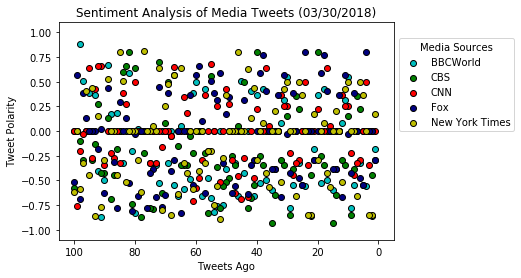

In [15]:
# Plotting Twitter info
plt.scatter(bbc['Tweets Ago'], bbc['Compound Score'], c='c', edgecolor='k', label='BBCWorld')
plt.scatter(cbs['Tweets Ago'], cbs['Compound Score'], c='g', edgecolor='k', label='CBS')
plt.scatter(cnn['Tweets Ago'], cnn['Compound Score'], c='r', edgecolor='k', label='CNN')
plt.scatter(fox['Tweets Ago'], fox['Compound Score'], c='navy', edgecolor='k', label='Fox')
plt.scatter(nyt['Tweets Ago'], nyt['Compound Score'], c='y', edgecolor='k', label='New York Times')

# Adjusting dimensions & labels
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.ylabel("Tweet Polarity")
plt.ylim(-1.1,1.1)
plt.legend(bbox_to_anchor=(1, 0.95), title='Media Sources', fontsize='medium')

plt.savefig("Sentiment_Analysis_of_Tweets.png", bbox_inches="tight")
plt.show()

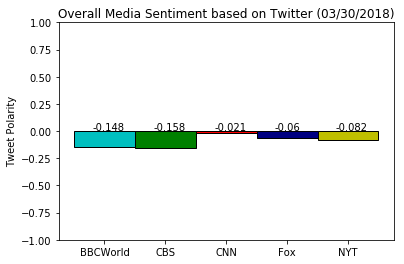

In [18]:
plt.bar(0, bbc['Compound Score'].mean(), color='c', edgecolor='k', width=1)
plt.bar(1, cbs['Compound Score'].mean(), color='g', edgecolor='k', width=1)
plt.bar(2, cnn['Compound Score'].mean(), color='r', edgecolor='k', width=1)
plt.bar(3, fox['Compound Score'].mean(), color='navy', edgecolor='k', width=1)
plt.bar(4, nyt['Compound Score'].mean(), color='y', edgecolor='k', width=1)

plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%m/%d/%Y")))
plt.ylabel("Tweet Polarity")
plt.ylim(-1,1)

x_labels = ["BBCWorld", "CBS", "CNN", "Fox", "NYT"]

x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)

for a,b in zip(np.arange(5), [bbc['Compound Score'].mean(),cbs['Compound Score'].mean(),
                              cnn['Compound Score'].mean(),
                             fox['Compound Score'].mean(),nyt['Compound Score'].mean()]):
    if b > 0:
        plt.text(a-0.2,b-b-0.015,str(round(b,3)))
    else:
        plt.text(a-0.2,b-b+0.01,str(round(b,3)))

plt.savefig("Overall_Media_Sentiment.png")
plt.show()

In [21]:
# Exporting DataFrame
tweets_df.to_csv("Tweets_Sentiment_Analysis.csv", index=False)